In [124]:
from fastai.vision.all import *
from fastai.data.all import *
from fastai.data.all import untar_data
import matplotlib as mpl
import matplotlib.pyplot as plt
from fastai.data.block import *

In [125]:
mpl.rc("image", cmap="Greys")

In [126]:
# will untar at ~/.fastai/data
path = untar_data(URLs.MNIST_SAMPLE)

In [127]:
path.ls()

(#3) [Path('/Users/raduw/.fastai/data/mnist_sample/valid'),Path('/Users/raduw/.fastai/data/mnist_sample/labels.csv'),Path('/Users/raduw/.fastai/data/mnist_sample/train')]

In [128]:
threes = (path / 'train' / '3').ls().sorted()
sevens = (path / 'train' / '7').ls().sorted()
threes

(#6131) [Path('/Users/raduw/.fastai/data/mnist_sample/train/3/10.png'),Path('/Users/raduw/.fastai/data/mnist_sample/train/3/10000.png'),Path('/Users/raduw/.fastai/data/mnist_sample/train/3/10011.png'),Path('/Users/raduw/.fastai/data/mnist_sample/train/3/10031.png'),Path('/Users/raduw/.fastai/data/mnist_sample/train/3/10034.png'),Path('/Users/raduw/.fastai/data/mnist_sample/train/3/10042.png'),Path('/Users/raduw/.fastai/data/mnist_sample/train/3/10052.png'),Path('/Users/raduw/.fastai/data/mnist_sample/train/3/1007.png'),Path('/Users/raduw/.fastai/data/mnist_sample/train/3/10074.png'),Path('/Users/raduw/.fastai/data/mnist_sample/train/3/10091.png')...]

In [129]:
im3_path = threes[0]
im3 = Image.open(im3_path)
im3

In [130]:
numbers = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=GrandparentSplitter(train_name="train", valid_name="valid"),
    batch_tfms=[]
)

In [131]:
dls = numbers.dataloaders(path)

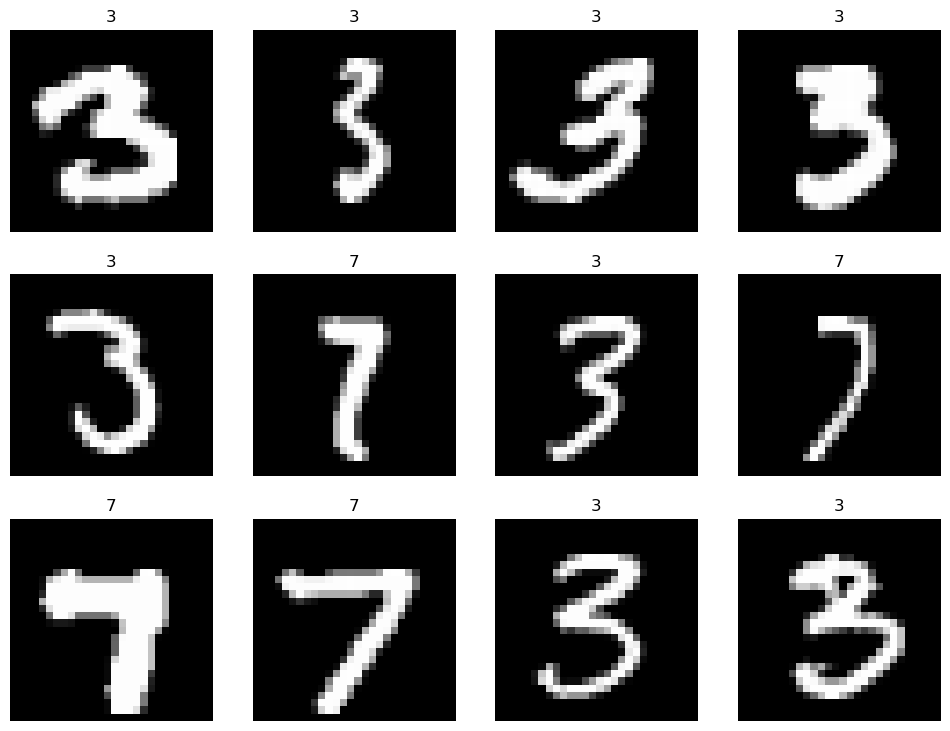

In [132]:
dls.show_batch(max_n=12, nrows=3)

In [133]:
array(im3)[4:10, 4:10]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=uint8)

In [134]:
tensor(im3)[4:10, 4:10]

tensor([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=torch.uint8)

In [135]:
im3_t = tensor(im3)

In [136]:
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,42,118,219,166,118,118,6,0,0,0,0
1,0,0,0,0,0,0,103,242,254,254,254,254,254,66,0,0,0,0
2,0,0,0,0,0,0,18,232,254,254,254,254,254,238,70,0,0,0
3,0,0,0,0,0,0,0,104,244,254,224,254,254,254,141,0,0,0
4,0,0,0,0,0,0,0,0,207,254,210,254,254,254,34,0,0,0
5,0,0,0,0,0,0,0,0,84,206,254,254,254,254,41,0,0,0
6,0,0,0,0,0,0,0,0,0,24,209,254,254,254,171,0,0,0
7,0,0,0,0,0,0,0,0,91,137,253,254,254,254,112,0,0,0
8,0,0,0,0,0,0,40,214,250,254,254,254,254,254,34,0,0,0
9,0,0,0,0,0,0,81,247,254,254,254,254,254,254,146,0,0,0


In [137]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors), len(seven_tensors)

(6131, 6265)

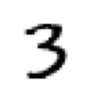

In [138]:
show_image(three_tensors[1]);

In [139]:
stacked_sevens = torch.stack(seven_tensors).float() / 255
stacked_threes = torch.stack(three_tensors).float() / 255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [140]:
stacked_threes.ndim

3

In [141]:
mean3 = stacked_threes.mean(0)

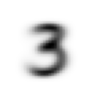

In [142]:
show_image(mean3);

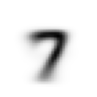

In [143]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

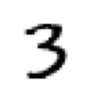

In [144]:
a_3 = stacked_threes[1]
show_image(a_3);

In [145]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3) ** 2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [146]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7) ** 2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [147]:
import torch.nn.functional as F

F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3, mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [148]:
(path / 'valid' / '3').ls()

(#1010) [Path('/Users/raduw/.fastai/data/mnist_sample/valid/3/3975.png'),Path('/Users/raduw/.fastai/data/mnist_sample/valid/3/1804.png'),Path('/Users/raduw/.fastai/data/mnist_sample/valid/3/4940.png'),Path('/Users/raduw/.fastai/data/mnist_sample/valid/3/5492.png'),Path('/Users/raduw/.fastai/data/mnist_sample/valid/3/5479.png'),Path('/Users/raduw/.fastai/data/mnist_sample/valid/3/8607.png'),Path('/Users/raduw/.fastai/data/mnist_sample/valid/3/7252.png'),Path('/Users/raduw/.fastai/data/mnist_sample/valid/3/4983.png'),Path('/Users/raduw/.fastai/data/mnist_sample/valid/3/3746.png'),Path('/Users/raduw/.fastai/data/mnist_sample/valid/3/5860.png')...]

In [149]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path / "valid/3").ls()])
valid_3_tens = valid_3_tens.float() / 255
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path / "valid/7").ls()])
valid_7_tens = valid_7_tens.float() / 255
valid_3_tens.shape, valid_7_tens.shape
valid_3_tens[0].mean((-1,-2))
t = tensor([[1,2,3],[4,5,6]]).float()
t.mean(), t.mean(0), t.mean(1), t.mean(-1), t.mean(-2)


(tensor(3.5000),
 tensor([2.5000, 3.5000, 4.5000]),
 tensor([2., 5.]),
 tensor([2., 5.]),
 tensor([2.5000, 3.5000, 4.5000]))

In [150]:
def minst_distance(a,b):
    return (a-b).abs().mean((-1,-2))
minst_distance(a_3, mean3)

tensor(0.1114)

In [151]:
valid_3_dist = minst_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1634, 0.1145, 0.1363,  ..., 0.1105, 0.1111, 0.1640]),
 torch.Size([1010]))

# Optimizing a quadratic function

In [209]:
def plot_function(f, tx=None, ty=None, title=None, min=-2, max=2, figsize=(6,4), fig=None, ax=None):
    x = torch.linspace(min,max, 100)
    if fig is None:
        fig,ax = plt.subplots(figsize=figsize)
    ax.plot(x,f(x))
    if tx is not None: ax.set_xlabel(tx)
    if ty is not None: ax.set_ylabel(ty)
    if title is not None: ax.set_title(title)
    return fig,ax



In [210]:
def f(x): 
    return x**2

(<Figure size 600x400 with 1 Axes>, <Axes: xlabel='x', ylabel='x**2'>)

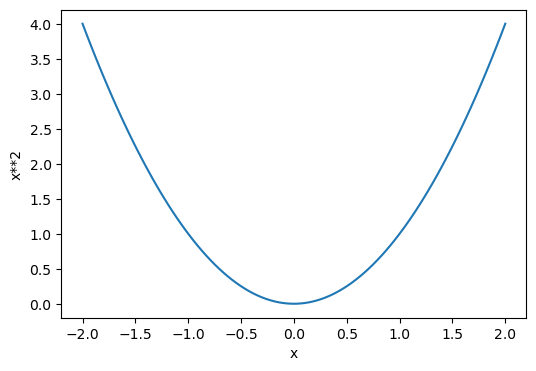

In [211]:
plot_function(f, 'x', 'x**2')

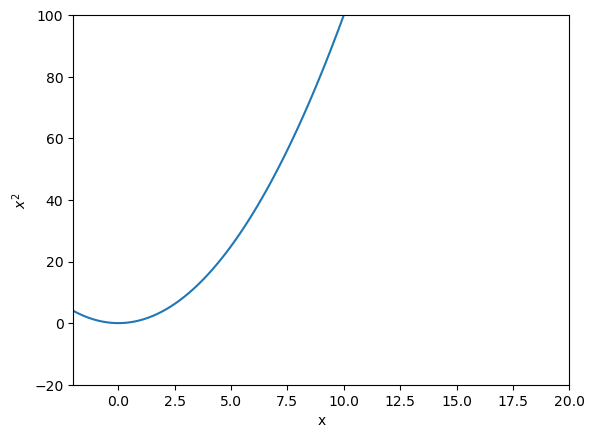

In [212]:
dots = torch.linspace(-10,10,100)
fig, ax = plt.subplots()
ax.set_xlabel('x')
ax.set_ylabel('$x^2$')
ax.set_xlim(-2,20)
ax.set_ylim(-20,100)
ax.plot(dots, f(dots))

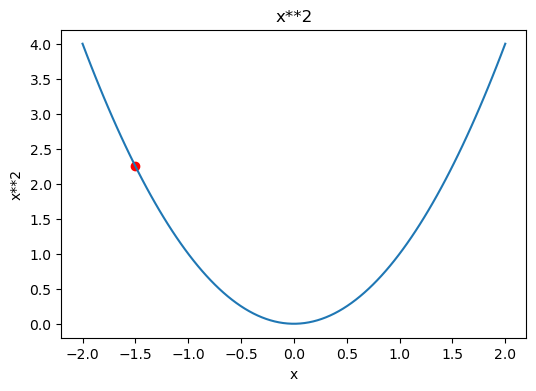

In [213]:
plot_function(f, 'x', 'x**2', 'x**2')
vx = -1.5
plt.scatter(vx, f(vx), color="red");

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': '$x^2$'}, xlabel='x', ylabel='$x^2$'>)

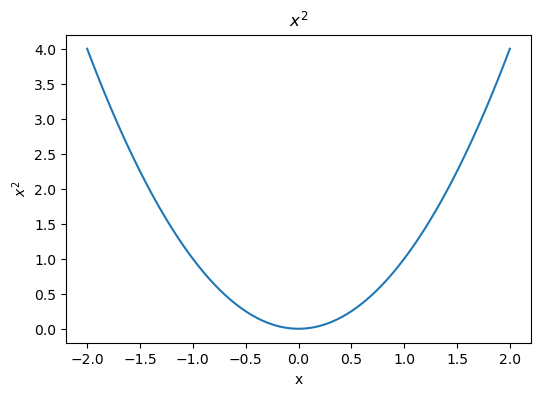

In [214]:
from functools import partial
def generic(a,b,c,x):
    return a*(x**2) + b*x + c


def make_quadratic(a,b,c):
    return partial(generic, a, b, c)

f2 = make_quadratic(1,0,0)
plot_function(f2, 'x', '$x^2$', '$x^2$')

In [215]:
import numpy as np

In [216]:
xt = tensor(3.).requires_grad_()

In [217]:
yt = f(xt)

In [218]:
yt

tensor(9., grad_fn=<PowBackward0>)

In [219]:
yt.backward()

In [220]:
xt.grad

tensor(6.)

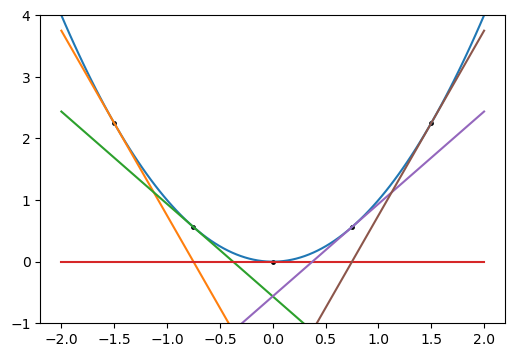

In [239]:

def df(f,x):
    """
    Derivative of f(x) in x (as a function)
    """
    xt = tensor(x).requires_grad_()
    yt = f(xt)
    yt.backward()
    slope = xt.grad
    def tangent(xx):
        return slope * (xx - x) + f(x)
    return tangent

def draw_tangent(f, x, fig, ax):
    derivative = df(f,x)
    plot_function(derivative, fig=fig, ax=ax)
    plt.scatter(x=x, y=f(x), color="black", s=6)

fix, ax = plot_function(f)
#ax.set_xlim(-2,20)
ax.set_ylim(-1,4)

for i in torch.linspace(-1.5,1.5,5):
    x = i.item()
    draw_tangent(f, x, fig=fix, ax=ax)



    

In [240]:
torch.arange(0,20)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19])

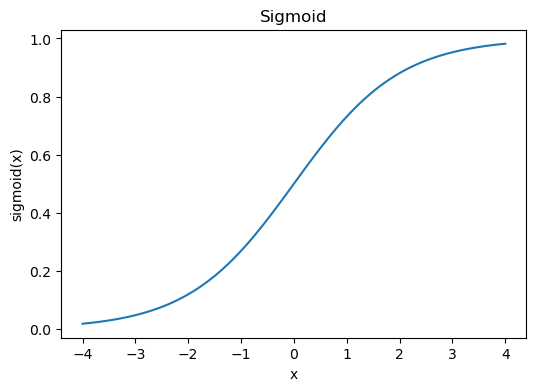

In [243]:
plot_function(torch.sigmoid, 'x', 'sigmoid(x)', 'Sigmoid', min=-4, max=4);

In [244]:
linear_model = nn.Linear(28*28, 1)

In [245]:
linear_model

Linear(in_features=784, out_features=1, bias=True)

In [258]:
from torch.nn import functional as F

F.relu(tensor([7,-3.2, 0., 22., -123.]))

tensor([ 7.,  0.,  0., 22.,  0.])

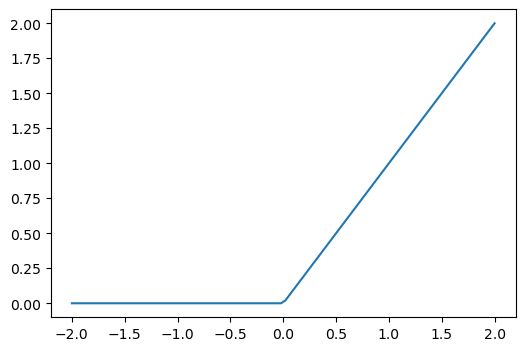

In [250]:
plot_function(relu);

In [259]:
F.relu(tensor([7,-3.2, 0., 22., -123.]))

tensor([ 7.,  0.,  0., 22.,  0.])